In [1]:
import assm
import pyreadr
import numpy as np
import pandas as pd

import seaborn as sns

from assm.model.models_GARD import GARDModel_2A
from assm.utility.load_data import load_example_dataset

In [2]:
sns.set(context="talk",
        style="white",
        palette="husl",
        rc={'figure.figsize': (15, 8)})

## Data preprocessing

In [3]:
data = load_example_dataset()
data = data[data['sbj']<10]
data

,sbj,Trial,rt,item_value_1,item_value_2,choice,DwellLeft,DwellRight,OV,rt_max,Right,gaze_1,gaze_2,diff,Overall Value,Right Value - Left Value,gaze diff,Dwell Time Advantage (R - L),Magnitude
0,1,2.0,1.913,3.0,2.0,1.0,698.0,798.0,5.0,3.794033,0,0.466578,0.533422,1.0,5.0,-1.0,4.0,0.00,Low
1,1,3.0,1.121,5.0,10.0,2.0,540.0,262.0,15.0,3.794033,1,0.673317,0.326683,5.0,15.0,5.0,2.0,-0.50,High
2,1,4.0,2.051,6.0,6.0,2.0,743.0,857.0,12.0,3.794033,1,0.464375,0.535625,0.0,12.0,0.0,4.0,0.00,High
3,1,5.0,1.655,6.0,7.0,2.0,519.0,700.0,13.0,3.794033,1,0.425759,0.574241,1.0,13.0,1.0,5.0,0.25,High
4,1,9.0,2.504,6.0,2.0,1.0,1137.0,1032.0,8.0,3.794033,0,0.524205,0.475795,4.0,8.0,-4.0,4.0,0.00,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,9,96.0,0.935,0.0,5.0,2.0,479.0,99.0,5.0,2.588291,1,0.828720,0.171280,5.0,5.0,5.0,1.0,-0.75,Low
815,9,97.0,0.870,4.0,5.0,2.0,457.0,119.0,9.0,2.588291,1,0.793403,0.206597,1.0,9.0,1.0,1.0,-0.75,High
816,9,98.0,0.844,6.0,9.0,1.0,358.0,203.0,15.0,2.588291,0,0.638146,0.361854,3.0,15.0,3.0,3.0,-0.25,High
817,9,99.0,1.090,1.0,2.0,2.0,319.0,537.0,3.0,2.588291,1,0.372664,0.627336,1.0,3.0,1.0,5.0,0.25,Low


## Model compiling:

In [4]:
model = GARDModel_2A(hierarchical_levels=2, additive=True, multiplicative=True)

Using cached StanModel


In [5]:
model.model_label

'hierGARD_2A_hybrid'

## Model fitting:

In [7]:
n_warmup = 750
n_sampling = 750
n_chains = 2

In [8]:
model_fit = model.fit(data,
                      iter_warmup=n_warmup,
                      iter_sampling=n_sampling,
                      chains=n_chains,
                      include_last_values=False,
                      print_diagnostics=False)

14:47:19 - cmdstanpy - INFO - CmdStan start processing


Fitting the model using the priors:
sigma_priors {'mu_mu': 1, 'sd_mu': 3, 'mu_sd': 0, 'sd_sd': 3}
v_priors {'mu_mu': 9, 'sd_mu': 3, 'mu_sd': 2, 'sd_sd': 2}
wd_priors {'mu_mu': 1, 'sd_mu': 2, 'mu_sd': 1, 'sd_sd': 1}
ws_priors {'mu_mu': -1, 'sd_mu': 2, 'mu_sd': 3, 'sd_sd': 1}
lambda_priors {'mu_mu': 0, 'sd_mu': 2, 'mu_sd': 1, 'sd_sd': 1}
gam_priors {'mu_mu': 0, 'sd_mu': 1, 'mu_sd': 1, 'sd_sd': 1}
ndt_priors {'mu_mu': 0, 'sd_mu': 2, 'mu_sd': 1, 'sd_sd': 1}


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

14:49:23 - cmdstanpy - INFO - CmdStan done processing.
14:49:23 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: Exception: Exception: Phi: x is nan, but must be not nan! (in '/Users/khamir/_Projects/_PHD/_01_How_to_acount_attention/_codes/assm/assm/stan_models/GARD_2A/hierGARD_2A_hybrid.stan', line 16, column 4 to column 94) (in '/Users/khamir/_Projects/_PHD/_01_How_to_acount_attention/_codes/assm/assm/stan_models/GARD_2A/hierGARD_2A_hybrid.stan', line 37, column 10 to column 57) (in '/Users/khamir/_Projects/_PHD/_01_How_to_acount_attention/_codes/assm/assm/stan_models/GARD_2A/hierGARD_2A_hybrid.stan', line 193, column 2 to column 57)
	Exception: Exception: Exception: Phi: x is nan, but must be not nan! (in '/Users/khamir/_Projects/_PHD/_01_How_to_acount_attention/_codes/assm/assm/stan_models/GARD_2A/hierGARD_2A_hybrid.stan', line 16, column 4 to column 94) (in '/Users/khamir/_Projects/_PHD/_01_How_to_acount_attention/_codes/assm/assm/stan_models/GARD_2A/hierGARD_2A


(1500, 819)
(819,)


# Model checking:

In [9]:
model_fit.rhat.sort_values(by='rhat')

,rhat,variable
drift_left_t[135],0.998674,drift_left_t[135]
log_lik[574],0.998674,log_lik[574]
drift_left_t[88],0.998675,drift_left_t[88]
log_lik[505],0.998676,log_lik[505]
z_sigma[2],0.998679,z_sigma[2]
...,...,...
z_ndt[4],1.004880,z_ndt[4]
z_v[1],1.004900,z_v[1]
sd_wd,1.005010,sd_wd
sd_ndt,1.005750,sd_ndt


In [10]:
model_fit.waic

{'lppd': -1063.0519771547188,
 'p_waic': 35.83663852601534,
 'waic': 2197.7772313614682,
 'waic_se': 66.03731469104348}

## Posteriors

In [11]:
model_fit.samples.describe()

,transf_mu_v,transf_mu_wd,transf_mu_ws,transf_mu_sigma,transf_mu_lambda,transf_mu_gam,transf_mu_ndt,v_sbj[1],v_sbj[2],v_sbj[3],...,gam_sbj[9],ndt_sbj[1],ndt_sbj[2],ndt_sbj[3],ndt_sbj[4],ndt_sbj[5],ndt_sbj[6],ndt_sbj[7],ndt_sbj[8],ndt_sbj[9]
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1.500000e+03,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.330296,0.068234,0.007126,0.355275,0.139769,0.655522,0.246555,0.353767,0.267067,9.198443e-02,...,0.717965,0.169303,0.185417,0.242833,0.467294,0.162313,0.313168,0.156028,0.497777,0.224321
std,0.139508,0.015780,0.006716,0.028874,0.101380,0.158552,0.091455,0.095446,0.138721,3.416995e-02,...,0.189985,0.084170,0.086149,0.125310,0.112355,0.077942,0.075444,0.089859,0.104924,0.087390
min,0.053748,0.024635,0.000196,0.262816,0.003068,0.034300,0.022107,0.012279,0.000352,1.384890e-07,...,0.004357,0.000417,0.000355,0.001428,0.009901,0.000803,0.008368,0.000745,0.078246,0.000170
25%,0.241268,0.058184,0.003112,0.335916,0.064253,0.549790,0.183527,0.301112,0.154018,7.015657e-02,...,0.584208,0.105849,0.122620,0.144240,0.405028,0.102924,0.269806,0.082219,0.447002,0.167143
50%,0.307567,0.066126,0.005754,0.352838,0.119096,0.651330,0.243048,0.367545,0.268054,9.622690e-02,...,0.718929,0.167213,0.185557,0.237465,0.485652,0.161308,0.322106,0.147643,0.511680,0.223732
75%,0.399487,0.075598,0.008811,0.373212,0.189961,0.764895,0.306755,0.422164,0.376802,1.180090e-01,...,0.874006,0.227964,0.249691,0.330788,0.546441,0.220144,0.365322,0.218240,0.565202,0.284276
max,1.243190,0.195611,0.080570,0.477296,0.838359,0.997456,0.589874,0.571451,0.640040,1.678040e-01,...,1.000000,0.463323,0.492144,0.591441,0.730867,0.428132,0.512754,0.477010,0.808106,0.508267


0.33029606213333335 [0.0853102, 0.601775]
0.068234114 [0.0388917, 0.0961151]
0.007126424589333332 [0.000195725, 0.0180021]
0.35527525266666665 [0.299172, 0.413465]
0.13976882428666665 [0.00306779, 0.336931]
0.6555221978 [0.388752, 0.983602]
0.2465553003333333 [0.0690835, 0.418176]


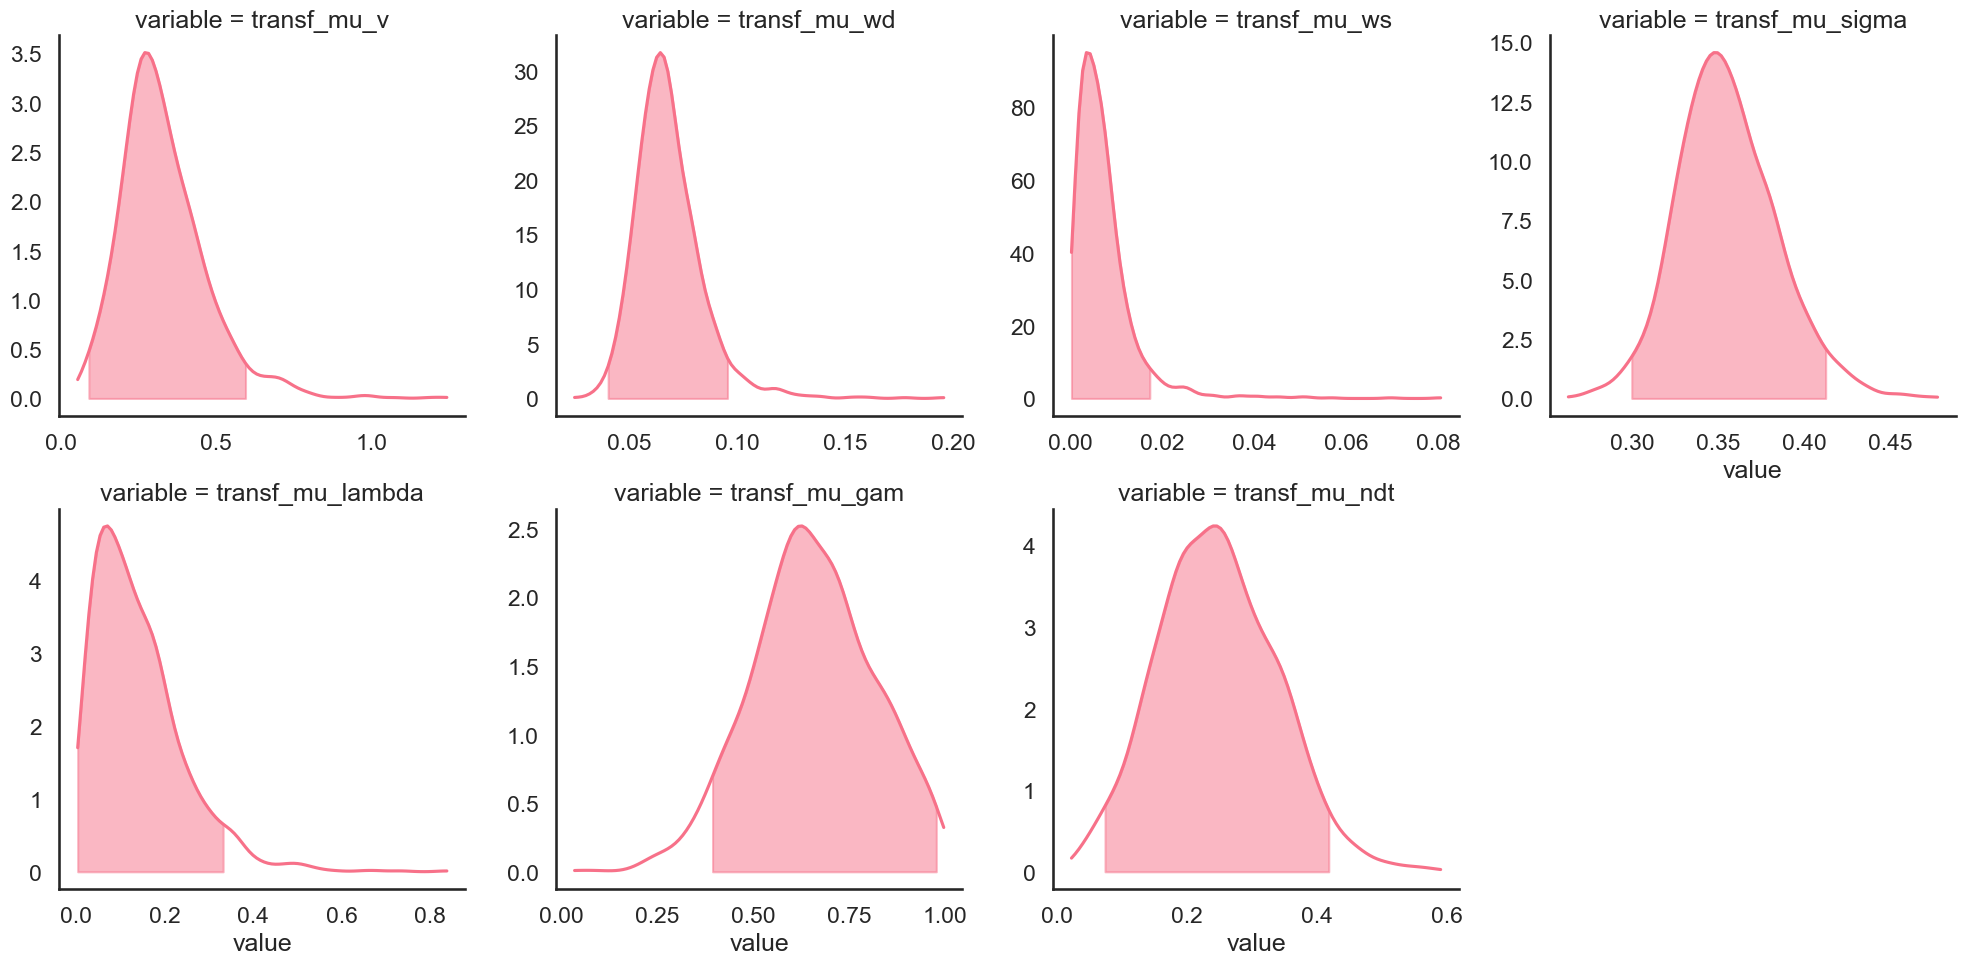

In [12]:
g = model_fit.plot_posteriors(height=5, show_intervals='HDI')